# Predicting heart disease using machine learning
---

## 1. Business Understanding

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

---

## 2. Data Understanding

The original data came from the Cleavland data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease). There is also a version of it available on [Kaggle.](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset). The data consists of 1 csv file and is tabular.

Our data consists of 14 numerical columns.

13 feature variables and 1 target variable

In [1]:
## Loading libraries

# EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# style
plt.style.use('default')

load data

In [2]:
heart_disease = pd.read_csv("data/heart-disease.csv")

print(heart_disease.shape)
heart_disease.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Numerical columns**

`age` - age in years

`sex` - (1 = male; 0 = female)

`cp` - chest pain type

`trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

`chol` - serum cholestoral in mg/dl

`serum` = LDL + HDL + .2 * triglycerides

`fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

`restecg` - resting electrocardiographic results

`thalach` - maximum heart rate achieved

`exang` - exercise induced angina (1 = yes; 0 = no)

`oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

`slope` - the slope of the peak exercise ST segment

`ca` - number of major vessels (0-3) colored by flourosopy

`thal` - thalium stress result

`target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [3]:
## Describe the data
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
## Are there missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data import has no missing values

In [5]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


This helps us see the summary statistics of each column and develop a general understanding of our data. 

We can see that the mean age of patients in our dataset is 54 years

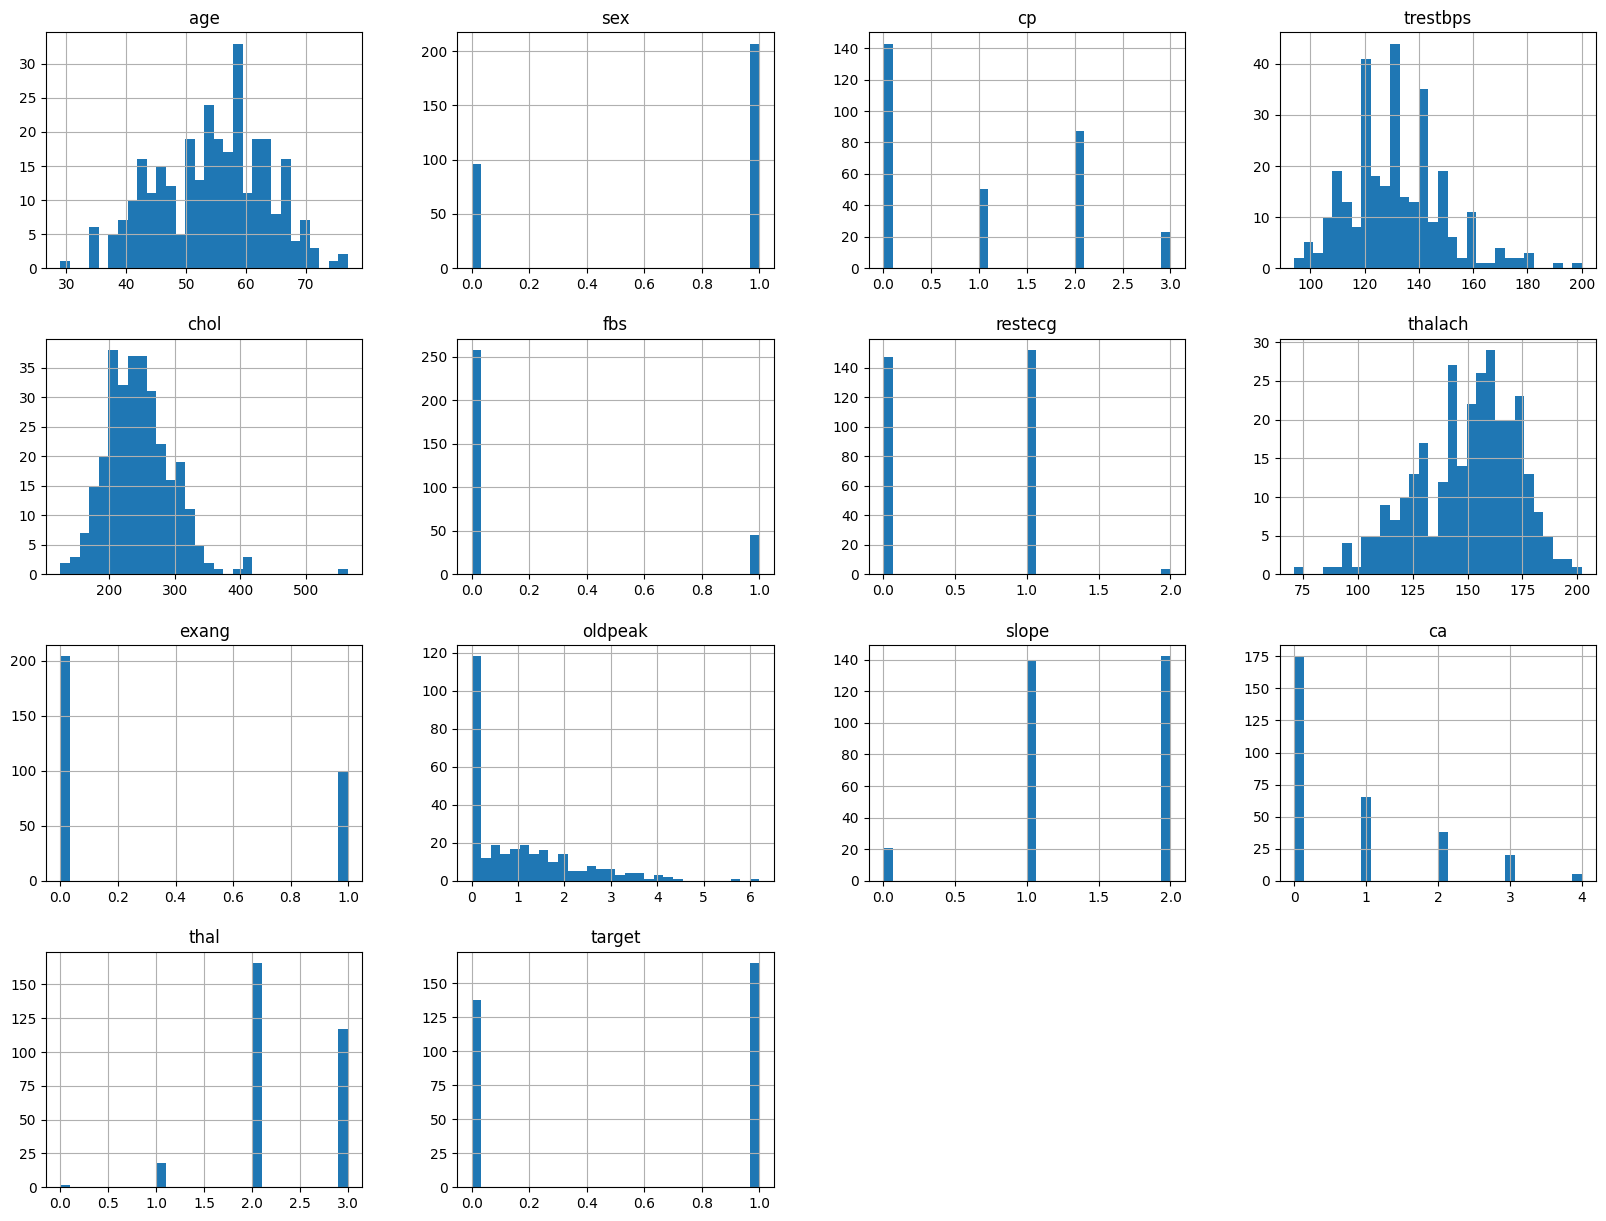

In [6]:
## Quick overview of the data

heart_disease.hist(bins=30, figsize=(20,15))
plt.show()

The above visualization gives us a general idea of how our data is distributed.

Age, trestbps(resting blood pressue), chol (cholestrol), thalach (maximum heart rate achieved) and oldpeak (ST depression) appear to be discrete values while the remaining columns appear to be numerical categorical columns.


### Univariate Analysis

In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights

In [7]:
def binary_plot_distribution(df, column:str, title:str):
    """
    Plots a distribution of a column in a dataframe.

    Args:
        df (_type_): dataframe_
        column (_type_): column of interset
        title (_type_): Title of the plot
    """

    print(df[column].value_counts())

    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Number of patients')
    df[column].value_counts().plot(kind='bar', color = ['salmon', 'lightblue'])
    plt.xticks(rotation=0)


def plot_distributions(df, column: str, title: str):
    """
    Plots a distribution of a column in a dataframe.

    Args:
        df (_type_): Dataframe containing the column of interest
        column (_type_): Column of interset
        title (_type_): Title of the plot
    """

    print(df[column].describe())

    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[column], ax=ax_box, color = 'salmon', orient='h')
    sns.histplot(df[column], bins=30, ax=ax_hist, color = 'lightblue', kde=True)

    plt.xticks()
    fig.suptitle(title)
    

**1. Age**

> The age column identifies the ages of each patient in the dataset

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


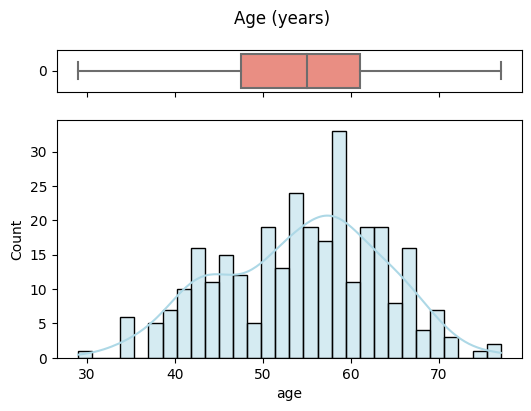

In [8]:
# Visualize the distribution
plot_distributions(heart_disease, 'age', 'Age (years)')


The `age` column appears to be relatively close to a normal distributin but has a minor second peak at around 40 years. However despite the slight peak, most of the patients in this dataset fall between the ages 47.5 and 61.

**2. Sex**
> Sex of the patient (0 - female, 1 - male)

sex
1    207
0     96
Name: count, dtype: int64


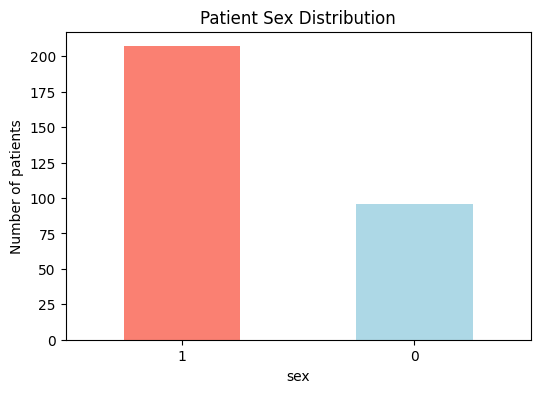

In [9]:
binary_plot_distribution(df=heart_disease, column="sex", title="Patient Sex Distribution")

From the distribution above, we see that there are more males in the dataset compared to females by approximately 2:1

**3. cp** <br>
Chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart

    1: Atypical angina: chest pain not related to heart

    2: Non-anginal pain: typically esophageal spasms (non heart related)
    
    3: Asymptomatic: chest pain not showing signs of disease

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64


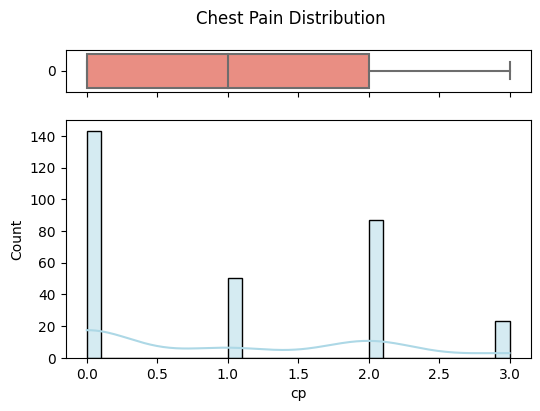

In [10]:
plot_distributions(heart_disease, "cp", "Chest Pain Distribution")

**4. trestbps**
> resting blood pressure
- Anything above 130-140 is a cause for concert

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


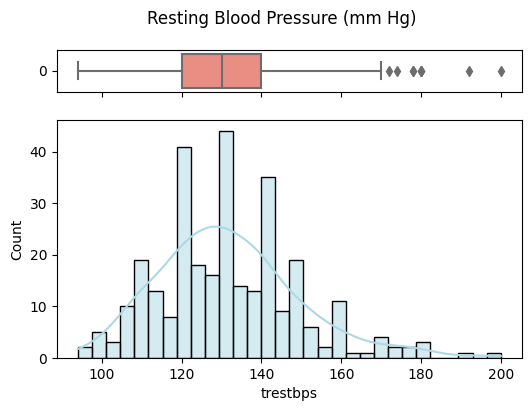

In [11]:
plot_distributions(heart_disease, "trestbps", "Resting Blood Pressure (mm Hg)")

From the bove distribution we see that the resting blood pressure is slightly skewed to the right. This means that there are a number of patients who have a resting blood pressure above the median at 130 and 75% percentile at 140. 

The average resting blood pressure is 131.6 which is basically identical to the median which means that this distribution is a normal distribution just with a long right tail.

**5. chol**
> Cholestrol level of the patients

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


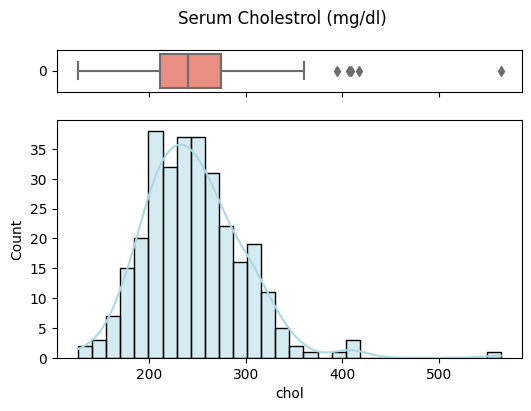

In [12]:
plot_distributions(heart_disease, "chol", "Serum Cholestrol (mg/dl)")

Similarly to the resting blood pressure, the average and median cholestrol level of the patients is quite close to each other meaning that its close to a normal distribution. However, it's important to note that the data is skewed to the right. 

This column however, will need to be analyzed further as the outliers seem to be quite high which is a cause for concern.

**6. fps**
> Fasting blood sugar

fbs
0    258
1     45
Name: count, dtype: int64


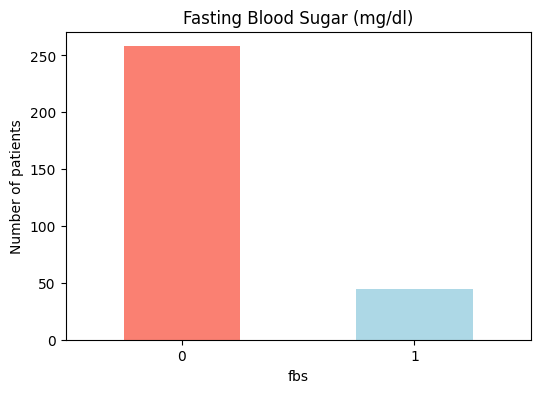

In [13]:
binary_plot_distribution(heart_disease, "fbs", "Fasting Blood Sugar (mg/dl)")

The distribution above is used to show the fasting blood sugar levels of the patients. 0 shows the number of patients with a fasting blood sugar level above 120mg/dl. 
It'll be important to analyze this column further as fbs > 126 signals diabetes, and there are so many patients with a fbs > 120

**7. restecg**
> resting electrocardiographic results

A non-invasive test that can detect abnormalities including arrhythmias, evidence of coronary heart disease, left ventricular hypertrophy and bundle branch blocks

restecg
1    152
0    147
2      4
Name: count, dtype: int64


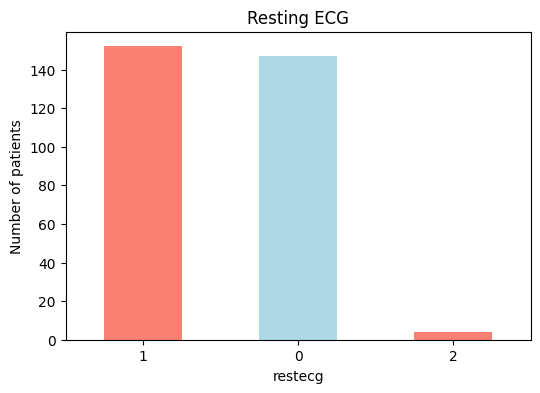

In [14]:
binary_plot_distribution(heart_disease, "restecg", "Resting ECG")

The data above shows that the resting ECG of over 99% of the patients in this dataset is either 0 or 1.

0 -> Nothing to note

1 -> ST-T Wave abnormality (signals non-normal heart beat)

2 -> Possible or definite left ventricular hypertrophy

**8. Thalach**
> Maximum heart rate achieved

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


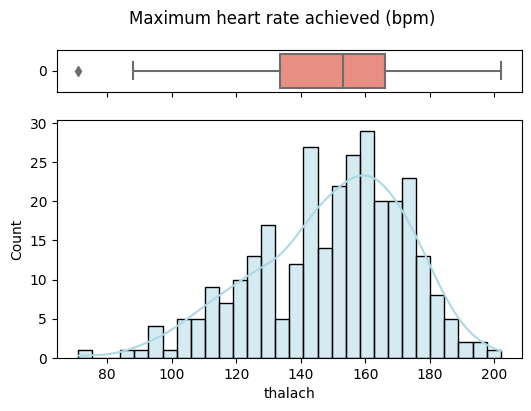

In [15]:
plot_distributions(heart_disease, "thalach", "Maximum heart rate achieved (bpm)")

The distribution above shows that the average maximum heart rate achieved by the patients is 149 beats per minute (bpm). The data is skewed to the left with at least 25% of the patients having a maximum heart rate of less than 133 bpm.

**9. Exang**
> Exercise Induced Angina

Pain in the chest when exercising, it goes away when they rest

exang
0    204
1     99
Name: count, dtype: int64


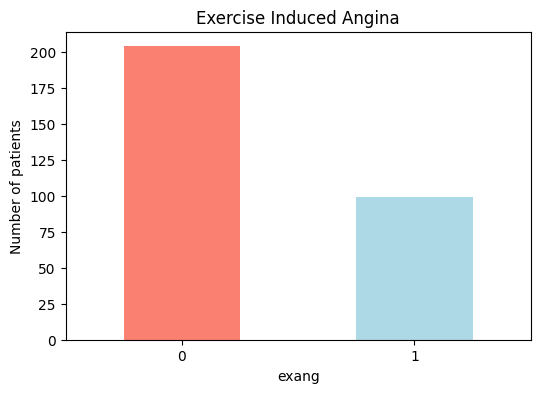

In [16]:
binary_plot_distribution(heart_disease, "exang", "Exercise Induced Angina")

From the distribution above we see that most of the patients didn't experience pain when exercising. It'll be beneficial to check and see what proportion of patients who experienced pain had heart disease

**10. Oldpeak**
> stress of heart during excercise unhealthy heart will stress more

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


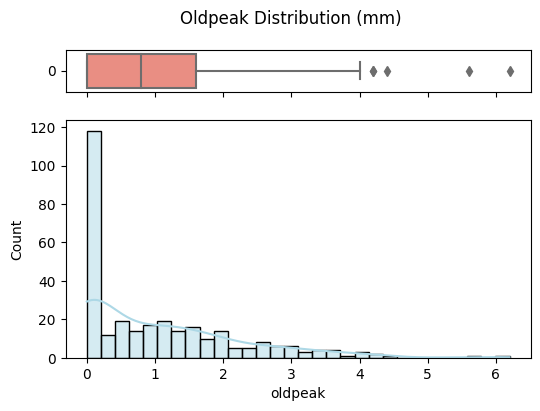

In [17]:
plot_distributions(heart_disease, "oldpeak", "Oldpeak Distribution (mm)")

The intensity of the exercise gradually increases, and the patient's heart rate and blood pressure are monitored continuously. The amount of ST segment depression, referred to as "oldpeak," is measured in millimeters (mm) below the baseline. The greater the oldpeak, the more significant the indication of potential coronary artery disease. From the distribution above we see that most of the patients had relatively normal oldpeak rates at 0 but a number of them had an oldpeak greater than 0 skewing the data to the right.

**11. Slope**
> the slope of the peak exercise ST segment

slope
2    142
1    140
0     21
Name: count, dtype: int64


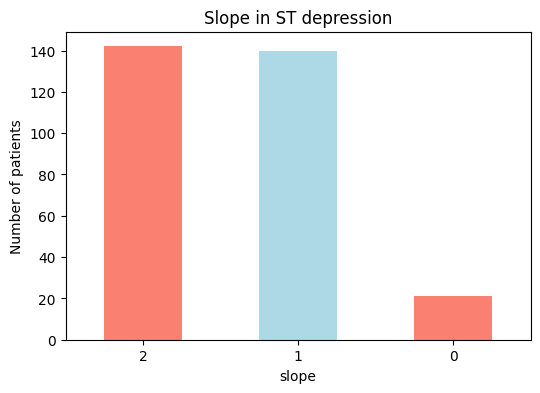

In [18]:
binary_plot_distribution(heart_disease, "slope", "Slope in ST depression")

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

From the distribution above, we see that the number of patients with downslopins (2) and flatsloping (1) are quite identical.

**12. ca**
> Coronary angiography is a medical imaging technique that involves injecting a contrast dye into the coronary arteries and taking X-ray images to visualize the blood flow and any potential blockages or abnormalities in the coronary arteries

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


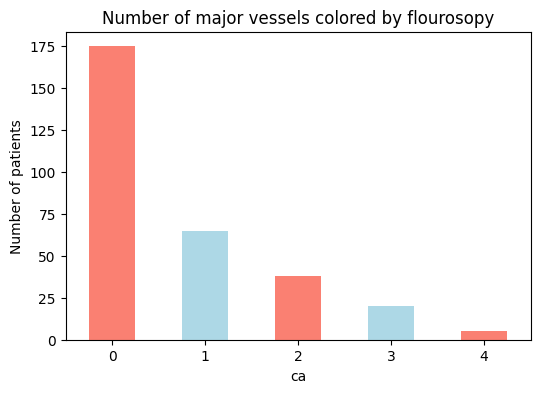

In [19]:
binary_plot_distribution(heart_disease, "ca", "Number of major vessels colored by flourosopy")

From the distribution above we see that a good portion of the patients major vessels showed no blockage or narrowing (0). The number of affected vessels is an essential factor in assessing the severity of coronary artery disease and helps guide treatment decisions. A higher number of affected vessels may suggest more extensive and severe disease.

**13. thal**
> thalium stress result

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64


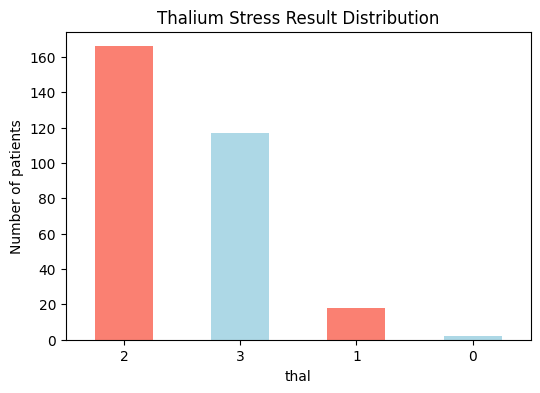

In [20]:
binary_plot_distribution(heart_disease, "thal", "Thalium Stress Result Distribution")

**Target**
> Whether the patients have heart disease or not (0 = no, 1 = yes)

target
1    165
0    138
Name: count, dtype: int64


Text(0.5, 0, '0 = No Disease, 1 = Disease')

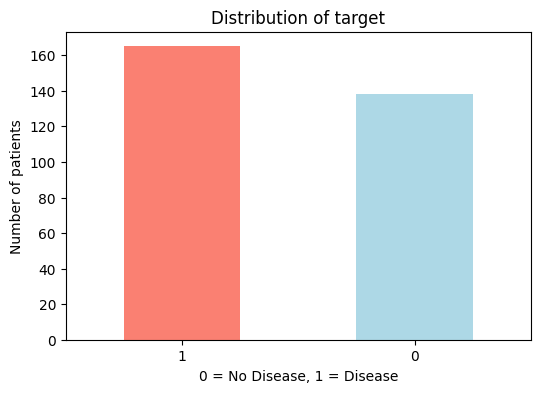

In [21]:
## Target column analysis

binary_plot_distribution(heart_disease, "target", "Distribution of target")
plt.xlabel("0 = No Disease, 1 = Disease")


### Bivariate Analysis

- This section is going to compare some variables against each other.

**Heart Disease Frequency according to Sex**

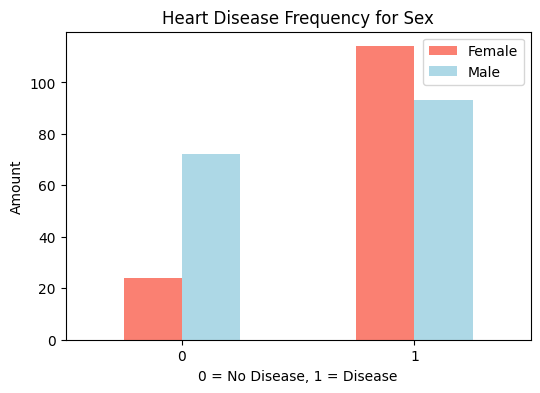

In [22]:
pd.crosstab(heart_disease["sex"], heart_disease["target"]).plot(kind="bar",
                                                                figsize=(6,4),
                                                                color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

From the distribution above we can see that the heart disease data is tilted towards to Male gender. Based on this existing dataset we can also infer that if the patient is female, there is a higher chance (approx. 80%+) they have heart disease.

In [23]:
pd.crosstab(heart_disease["sex"],heart_disease["target"])

target,0,1
sex,,
0,24,72
1,114,93


Based of the above visualization and table, we can infer that approximately 45% (93/207) of the male patients have heart disease, while 75% (72/96) of the female patients have heart disease

**Heart Disease, Age and Cholestrol Levels**

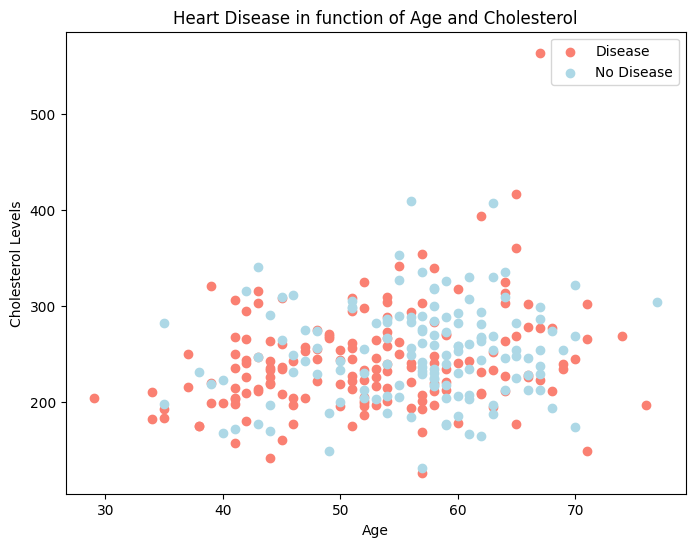

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(heart_disease["age"][heart_disease["target"]==1], 
            heart_disease["chol"][heart_disease["target"]==1],
            c="salmon")

plt.scatter(heart_disease["age"][heart_disease["target"]==0], 
            heart_disease["chol"][heart_disease["target"]==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol Levels")
plt.legend(["Disease", "No Disease"]);

From the distribution there is no clear and obvious trend between cholestrol levels of a patient and their age. We can't accurately make a prediction as to what cholestrol level would increase your chances of heart disease but with additional features a machine model may be able to do so.

**Comparing resting heart rate and target**

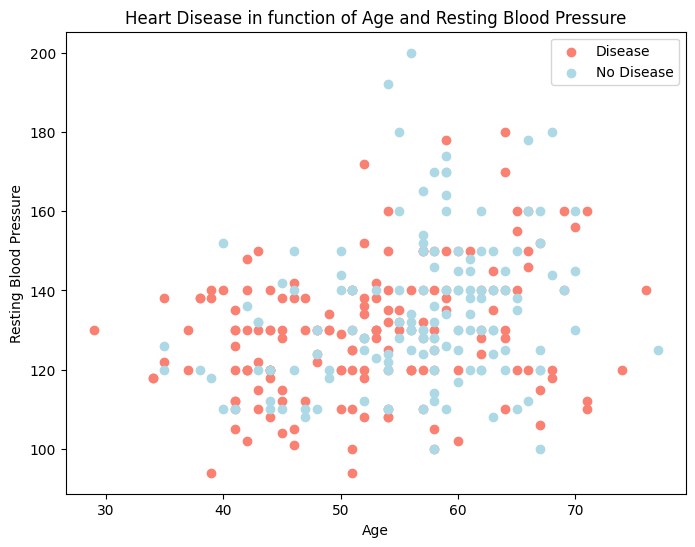

In [25]:
plt.figure(figsize=(8, 6))

plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.trestbps[heart_disease.target==1],
            c="salmon")

plt.scatter(heart_disease.age[heart_disease.target==0],
            heart_disease.trestbps[heart_disease.target==0],
            c="lightblue")

plt.title("Heart Disease in function of Age and Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Disease", "No Disease"]);

From the distribution above, there is no clear and obvious trend between someones age, their resting blood pressure and their likelihood of having heart disease.

## 3. Data Processing

This is usually the last stage before modelling and this invovles "wrangling". This stage usually involves:

- Data Cleaning
- Data Construction
- Data Integration
- Data Formatting

However, as this dataset is faily clean, this stage will involve analyzing columns which had outliers and see what action will be taken in managing them.

In [26]:
## Age column analysis

age_30 = heart_disease[heart_disease['age'] <= 30]
age_30


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


We have 1 patient at 29 years of age with heart disease. After further analysis online, the chances of heart disease at such an age is low but not impossible. Following this we will not remove this entry from our dataset.

In [27]:
## Cholestrol column analysis

over_450 = heart_disease[heart_disease['chol'] > 450]
over_450

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


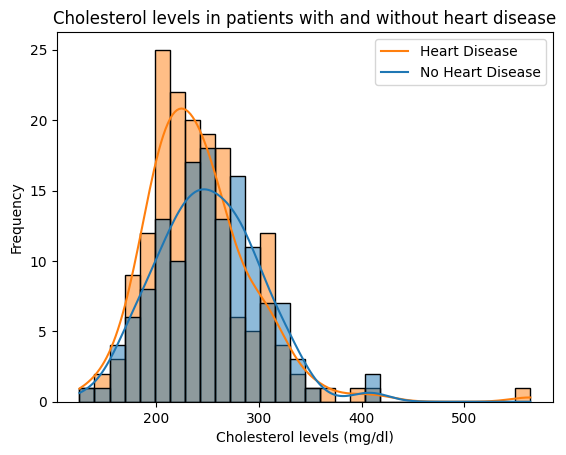

In [28]:
sns.histplot(heart_disease, x='chol', hue='target', bins=30, kde=True)
plt.legend(['Heart Disease', 'No Heart Disease']);
plt.xlabel('Cholesterol levels (mg/dl)');
plt.ylabel('Frequency');
plt.title('Cholesterol levels in patients with and without heart disease');

From the distribution above we can see that patients with heart disease tend to have higher cholestrol levels. One patient however, has a cholestrol level over 500 which is quite high and after further analysis online, though possible will be removed for the sake of this analysis.

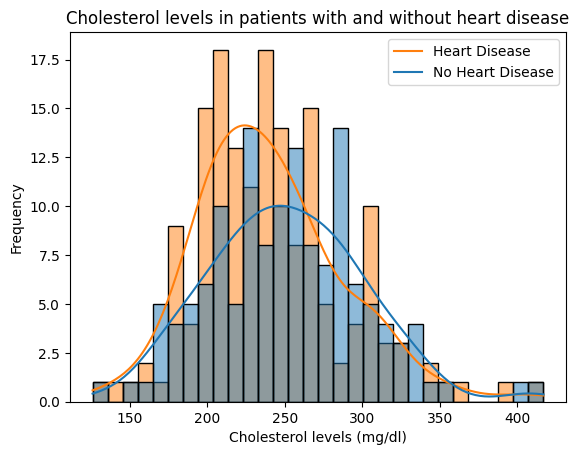

In [29]:
## Dropping entry with chol over 500

heart_disease = heart_disease[heart_disease['chol'] < 500]
heart_disease['chol'].max()

sns.histplot(heart_disease, x='chol', hue='target', bins=30, kde=True)
plt.legend(['Heart Disease', 'No Heart Disease']);
plt.xlabel('Cholesterol levels (mg/dl)');
plt.ylabel('Frequency');
plt.title('Cholesterol levels in patients with and without heart disease');

## 4. Modelling

This phase has four tasks:

> Correlation matrix <br>
> Select Modeling Techniques <br>
> Build Models <br>
> Assess Models

In [30]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
## Create X and y variables

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

**Correlation Matrix**

> A correlation matrix is a table showing correlation coefficients between variables

We want to ensure that none of the values in our dataset have a correlation coefficient of greater than 0.6 or less than -0.6 as that will mean they are highly dependent on aother feature.

In [32]:
X.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.092298,-0.073638,0.285074,0.198768,0.123668,-0.112119,-0.402041,0.100419,0.208534,-0.166471,0.280763,0.063155
sex,-0.092298,1.000000,-0.044712,-0.061698,-0.180288,0.043168,-0.063420,-0.041983,0.138885,0.098835,-0.034012,0.115297,0.216728
cp,-0.073638,-0.044712,1.000000,0.050920,-0.104171,0.096018,0.047920,0.294850,-0.392937,-0.151145,0.122160,-0.179131,-0.166087
trestbps,0.285074,-0.061698,0.050920,1.000000,0.152531,0.176532,-0.117638,-0.045357,0.065577,0.195103,-0.123786,0.099375,0.065977
chol,0.198768,-0.180288,-0.104171,0.152531,1.000000,0.023294,-0.139828,-0.020472,0.086855,0.047183,0.009799,0.090977,0.081377
fbs,0.123668,0.043168,0.096018,0.176532,0.023294,1.000000,-0.085748,-0.007946,0.024729,0.006420,-0.060852,0.137147,-0.030539
restecg,-0.112119,-0.063420,0.047920,-0.117638,-0.139828,-0.085748,1.000000,0.045723,-0.073235,-0.057278,0.091099,-0.074610,-0.008272
thalach,-0.402041,-0.041983,0.294850,-0.045357,-0.020472,-0.007946,0.045723,1.000000,-0.378200,-0.345162,0.388160,-0.212357,-0.098362
exang,0.100419,0.138885,-0.392937,0.065577,0.086855,0.024729,-0.073235,-0.378200,1.000000,0.289683,-0.259635,0.114280,0.209952
oldpeak,0.208534,0.098835,-0.151145,0.195103,0.047183,0.006420,-0.057278,-0.345162,0.289683,1.000000,-0.577124,0.224102,0.208964


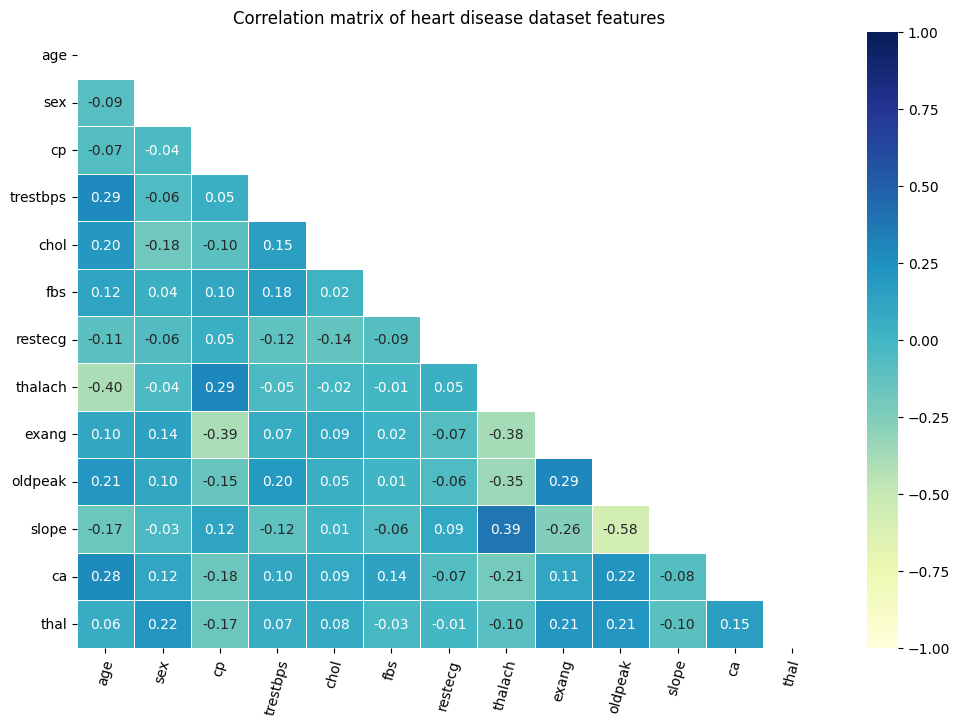

In [33]:
## Compute correlation matrix
corr_matrix = X.corr()

## Swt up the figure
fig, ax = plt.subplots(figsize=(12, 8))

## Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 mask=mask,
                 fmt=".2f",
                 cmap="YlGnBu",
                 vmin=-1,
                 vmax=1)
plt.title("Correlation matrix of heart disease dataset features")
plt.xticks(rotation=75);

None of the values in the corr_matrix are high or dependent on other features so no action will be taken and we can build the model

### Model Selection

In order to achieve the target stated in the evaluation of correctly predictin 95% of our data. The following are the models we wiil use and compare their respective results:
> Random Forest <br>
> Logistic Regression <br>
> K Nearest Neighbors

In [34]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
## Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1234)

In [37]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1


In [38]:
y_train.head()

261    0
257    0
113    1
111    1
150    1
Name: target, dtype: int64

In [39]:
## Putting the models in a dictionary

models = {"Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier()}

## Scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a function to fit and score models

def fit_score_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    """
    This function fits and scores the appropriate machine learning models. 

    This function requires the scaled X_train and X_test values because Logistic Regression is sensitive to data that isn't well scaled (different ranges).

    Args:
        model (_type_): Machine learning model to be used
        X_train_scaled (_type_): Training data scaled 
        X_test_scaled (_type_): Testing data scaled
        y_train (_type_): Training data
        y_test (_type_): Test data
    """

    ## Random seed
    np.random.seed(12345)

    ## Scores
    model_scores = {}

    ## Fit and score the models
    for model_name, model_inst in model.items():

        ## Fit model using scaled data
        model_inst.fit(X_train_scaled, y_train)

        ## Evaluate model using scaled data
        model_scores[model_name] = model_inst.score(X_test_scaled, y_test)

    return model_scores


In [40]:
print(X_train[:5])

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
261   52    1   0       112   230    0        1      160      0      0.0   
257   50    1   0       144   200    0        0      126      1      0.9   
113   43    1   0       110   211    0        1      161      0      0.0   
111   57    1   2       150   126    1        1      173      0      0.2   
150   66    1   0       160   228    0        0      138      0      2.3   

     slope  ca  thal  
261      2   1     2  
257      1   0     3  
113      2   0     3  
111      2   1     3  
150      2   0     1  


In [41]:
print(X_train_scaled[:5])

[[-0.21963892  0.67216607 -0.94638119 -1.08340868 -0.29543739 -0.43939653
   0.88838541  0.44627061 -0.70490738 -0.92584559  0.99080362  0.34537025
  -0.46028649]
 [-0.43569189  0.67216607 -0.94638119  0.72586974 -0.93324341 -0.43939653
  -1.02322963 -0.97217058  1.4186261  -0.1251442  -0.6335751  -0.7082276
   1.14738081]
 [-1.1918773   0.67216607 -0.94638119 -1.19648859 -0.6993812  -0.43939653
   0.88838541  0.48798947 -0.70490738 -0.92584559  0.99080362 -0.7082276
   1.14738081]
 [ 0.32049352  0.67216607  0.99470704  1.06510945 -2.50649826  2.27584867
   0.88838541  0.98861578 -0.70490738 -0.74791194  0.99080362  0.34537025
   1.14738081]
 [ 1.29273191  0.67216607 -0.94638119  1.63050896 -0.33795779 -0.43939653
  -1.02322963 -0.47154428 -0.70490738  1.12039129  0.99080362 -0.7082276
  -2.06795379]]


In [42]:
def plot_model_scores(model_scores:dict, title:str):
    """
    Plots the model scores of your model for easy understanding

    Args:
        model_scores (dict): A dictionary containing model names as keys and their respective scores as the value
        title (str): Title for the bar graph
    """

    modelled_name = list(model_scores.keys())
    modelled_val = list(model_scores.values())

    ##figure
    fig, ax = plt.subplots(figsize = (8,6))
    ax.bar(modelled_name, modelled_val, color="skyblue")
    ax.set(title=title,
           xlabel = "Models",
           ylabel="Accuracy Score")
    
    plt.show()

In [43]:
model_scores = fit_score_model(models, X_train_scaled, X_test_scaled, y_train, y_test)
print(model_scores)

{'Random Forest': 0.7704918032786885, 'Logistic Regression': 0.7704918032786885, 'KNN': 0.8032786885245902}


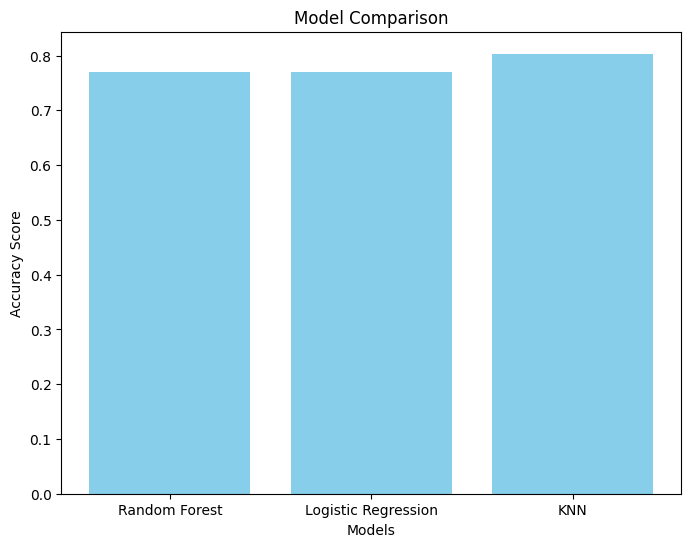

In [44]:
plot_model_scores(model_scores, "Model Comparison")

It's important to note that after scaling our data, the KNN score drastically improved from 0.56 to 0.80. The fact that our logistic regression score and random forest score are the same could be because there is little to no difference between the 2 models in this dataset. The `StandardScaler()` is generally a good starting point and is suitable for data that roughly follows a normal distribution.

However, as not all features in our dataset follow a nomrla distribution, we'll try another scaler, that works with data that isn't normally distributed or has features with different variances

In [45]:
## Putting the models in a dictionary

models = {"Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier()}

## Scaling the data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a function to fit and score models

def fit_score_model(model, X_train_scaled, X_test_scaled, y_train, y_test):
    """
    This function fits and scores the appropriate machine learning models. 

    This function requires the scaled X_train and X_test values because Logistic Regression is sensitive to data that isn't well scaled (different ranges).

    Args:
        model (_type_): Machine learning model to be used
        X_train_scaled (_type_): Training data scaled 
        X_test_scaled (_type_): Testing data scaled
        y_train (_type_): Training data
        y_test (_type_): Test data
    """

    ## Random seed
    np.random.seed(12345)

    ## Scores
    model_scores = {}

    ## Fit and score the models
    for model_name, model_inst in model.items():

        ## Fit model using scaled data
        model_inst.fit(X_train_scaled, y_train)

        ## Evaluate model using scaled data
        model_scores[model_name] = model_inst.score(X_test_scaled, y_test)

    return model_scores


In [46]:
model_two_scores = fit_score_model(models, X_train_scaled, X_test_scaled, y_train, y_test)
model_two_scores

{'Random Forest': 0.7704918032786885,
 'Logistic Regression': 0.7704918032786885,
 'KNN': 0.7540983606557377}

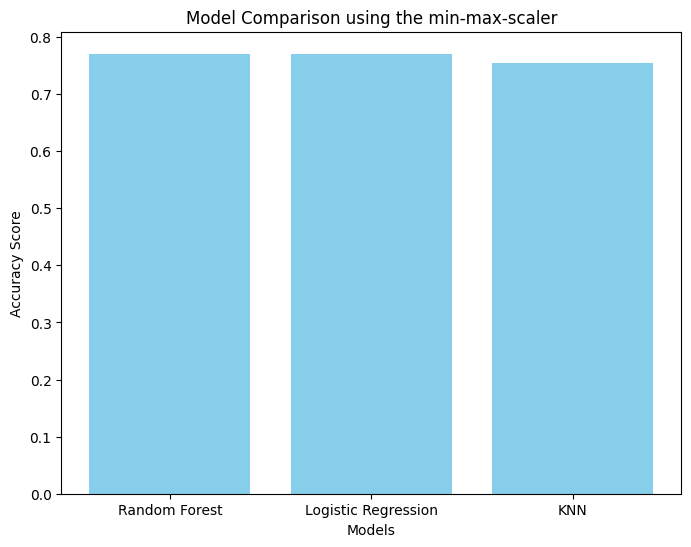

In [47]:
plot_model_scores(model_two_scores, "Model Comparison using the min-max-scaler")

Looking at the above model scores, we can infer that the `Min-Max-Scaler()` and `StandardScaler()` do not have much effect on the Random Forest model as well as the Logistic Regression. However, the Min-max-scaler slightly impacts the KNN model negatively reducing its accuracy score from 0.80 to 0.75.

### Hyperparameter Tuning

**KNN Tuning**

In [48]:
train_scores = []
test_scores = []

## List of different values for n neighbors
neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train_scaled, y_train)

    train_scores.append(knn.score(X_train_scaled, y_train))

    test_scores.append(knn.score(X_test_scaled, y_test))

In [49]:
train_scores

[1.0,
 0.8838174273858921,
 0.8879668049792531,
 0.8672199170124482,
 0.8796680497925311,
 0.8755186721991701,
 0.8547717842323651,
 0.8547717842323651,
 0.8630705394190872,
 0.8464730290456431,
 0.8340248962655602,
 0.8423236514522822,
 0.8381742738589212,
 0.8340248962655602,
 0.8257261410788381,
 0.8298755186721992,
 0.8340248962655602,
 0.8298755186721992,
 0.8215767634854771,
 0.8298755186721992]

In [50]:
test_scores

[0.7540983606557377,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836]

Maximum KNN Score on the test data 75.41


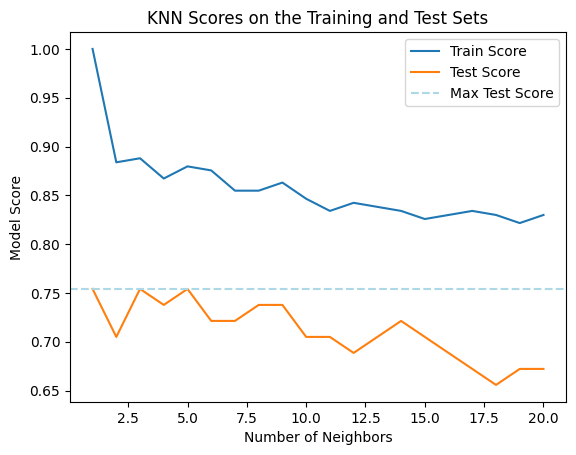

In [51]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.title("KNN Scores on the Training and Test Sets")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.axhline(max(test_scores), linestyle="--", 
            label = "Max Test Score", color="lightblue")
plt.legend();

print(f"Maximum KNN Score on the test data {max(test_scores)*100 :.2f}")

Based of the visualization above, we see that despite the KNN model performing exceptionally well on the training data, it didn't do so well when evaluating the model with the test data. Based of the above model we see that the KNN model fell short of our evaluation criteria of an accuracy score of 95%. 

This low score can be due to the KNN's simplicity as a machine learning model as it doesn't understand the data and make predictions but relies on the number of categories specified.

**Hyperparameter Tuning with RandomizedSearchCV**

The models we'll evaluate with RandomizedSearchCV are
- Logistic Regression
- Random Forest Classifier

In [52]:
## Creating Grid params for Logistic regression

logreg_grid = {
    "C": np.logspace(-4,4,30),
    "solver": ["liblinear","lbfgs"]
}


## Creating Grid params for RandomForestClassifier

rf_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth": [None, 3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [53]:
## Tuning the models 

np.random.seed(1234)

## Setting up search for logistic regression
rs_logreg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=logreg_grid,
                               cv = 5,
                               n_iter=20,
                               verbose=True)

## Fitting hyperparameters for logistic regression
rs_logreg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [54]:
## What were the best hyperparameter combinations?

rs_logreg.best_params_

{'solver': 'lbfgs', 'C': 0.38566204211634725}

In [55]:
rs_logreg.score(X_test_scaled, y_test)

0.7377049180327869

In [56]:
model_scores

{'Random Forest': 0.7704918032786885,
 'Logistic Regression': 0.7704918032786885,
 'KNN': 0.8032786885245902}

The hyperparameter tuned scores for logistic regression are slightly lower than the single score which was observed earlier which was to be expected. 

base model score = **0.770** while the tuned model score = **0.737**

In [57]:
## RandomForest

np.random.seed(1234)

## Setting up search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter=20,
                           verbose=True)

## Fit model
rs_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [58]:
## Best hyperparameters for Random Forest

rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_depth': None}

In [59]:
## Evaluating model

rs_rf.score(X_test_scaled, y_test)

0.7540983606557377

In [60]:
model_scores

{'Random Forest': 0.7704918032786885,
 'Logistic Regression': 0.7704918032786885,
 'KNN': 0.8032786885245902}

Based of the hyperparameters we provided in the grid, the random forest classifier scores slightly dropped which was to be expected from 0.770 to 0.754.

Between the 3 models, these were the following scores:
> KNN - 75.41% <br>
> Logistic Regression - 73.7% <br>
> Random Forest - 75.41%


**Hyperparameter tuning with GridSearchCV**

We have a baseline model which was computed earlier, then tuned results with RandomizedSearchCV. We will perform the last set of tuning usingGridSeachCV to perform an exhasutive test before we compare all the results together for a finalized conclusion.

In [61]:
## Different hyperparameters for our model
logred_grid = {
    "C": np.logspace(-4,4,30),
    "solver": ["liblinear","lbfgs"]
}

## Setting up the grid search
gs_logreg = GridSearchCV(LogisticRegression(),
                         param_grid=logred_grid,
                         cv = 5,
                         verbose=True)


## fit search
gs_logreg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs']},
             verbose=True)

In [62]:
## Best hyperparameters

gs_logreg.best_params_

{'C': 0.38566204211634725, 'solver': 'lbfgs'}

In [63]:
## Evaluate scores
gs_logreg.score(X_test_scaled, y_test)

0.7377049180327869

Suprisingly, both the results from the GridSearchCV and RandomSearchCV have returned the same results of 0.7377

In [64]:
## Testing our the Random Forest with GridSearchCV

## Creating Grid params for RandomForestClassifier

rf_grid = {
    "n_estimators": np.arange(10,100,10),
    "max_depth": [None, 3,5,10],
    "min_samples_split": np.arange(2,11,2),
    "min_samples_leaf":np.arange(1,10,2)
}

## Setting up the grid search
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv = 5,
                     verbose=True)

## Fitting our search
gs_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([1, 3, 5, 7, 9]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             verbose=True)

In [65]:
gs_rf.score(X_test_scaled, y_test)

0.7704918032786885

## 5. Evaluating our Models

This section will evaluate our Random Forest Classifier Model, beyond the accuracy score

- ROC Curve
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1 Score

In [66]:
y_preds = gs_rf.predict(X_test_scaled)

In [67]:
y_preds

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [68]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

**ROC Curve**

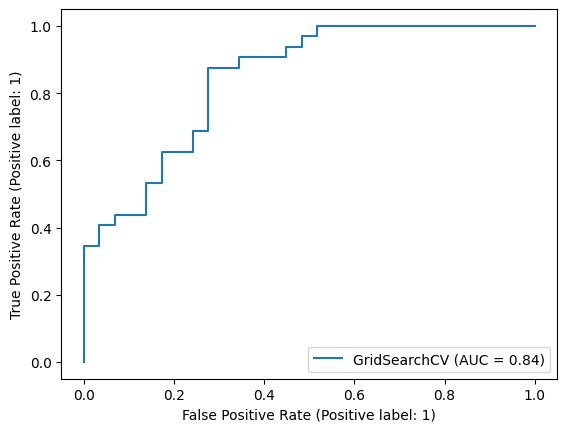

In [76]:
## Plot ROC Curve

RocCurveDisplay.from_estimator(X=X_test_scaled, y=y_test, estimator=gs_rf)

**Confusion Matrix**

In [77]:
print(confusion_matrix(y_test, y_preds))

[[21  8]
 [ 6 26]]


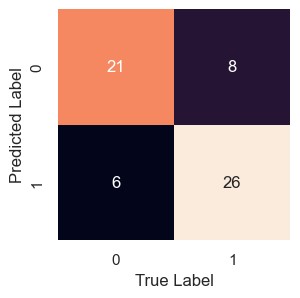

In [83]:
sns.set(font_scale= 1.0)

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


plot_conf_mat(y_test, y_preds)

**Classification Report**

In [84]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        29
           1       0.76      0.81      0.79        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



#### Calculate evaluation metrics using cross-validation


In [86]:
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 10,
 'n_estimators': 30}

In [87]:
## New classifier with best params

clf = RandomForestClassifier(n_estimators=30,
                             max_depth=10,
                             min_samples_leaf=9,
                             min_samples_split=10)

In [94]:
## Cross validated accuracy

cv_acc = cross_val_score(clf, X, y,
                         cv = 5,
                         scoring="accuracy")
cv_acc

array([0.85245902, 0.90163934, 0.81666667, 0.85      , 0.75      ])

In [95]:
cv_acc = np.mean(cv_acc)
cv_acc

0.834153005464481

In [104]:
## Cross validated precision

cv_prec = cross_val_score(clf, X, y,
                         cv = 5,
                         scoring="precision")
cv_prec


array([0.80555556, 0.90625   , 0.82352941, 0.82857143, 0.73684211])

In [105]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8201497002309696

In [106]:
## Cross validated recall
cv_recall = cross_val_score(clf, X, y,
                         cv = 5,
                         scoring="recall")
cv_recall

array([0.90909091, 0.90909091, 0.81818182, 0.90909091, 0.90625   ])

In [107]:
cv_recall = np.mean(cv_recall)
cv_recall

0.890340909090909

In [108]:
## Cross validated f1_score

cv_f1 = cross_val_score(clf, X, y,
                         cv = 5,
                         scoring="f1")
cv_f1

array([0.87671233, 0.84375   , 0.84848485, 0.88571429, 0.8115942 ])

In [109]:
cv_f1 = np.mean(cv_recall)
cv_f1

0.890340909090909

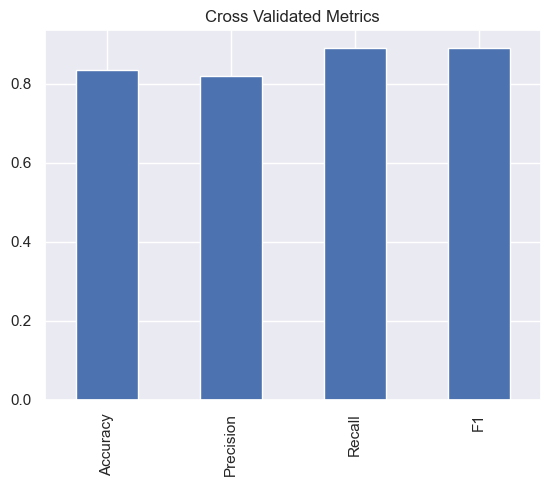

In [113]:
## Visualize our cross validated metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Metrics",
                      legend=False);

### Feature Importance

Which feature contributed the most to the outcome of the model and how did they contribute?

In [114]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
## Fitting an instance with the best params we got

gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 10,
 'n_estimators': 30}

In [118]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,
                             min_samples_leaf=9, min_samples_split=10)

clf.fit(X_train, y_train);

In [123]:
importances = clf.feature_importances_


feature_names = X.columns
print(feature_names)

std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


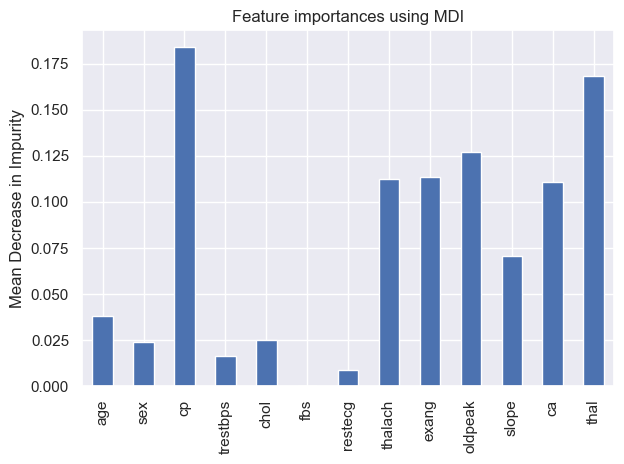

In [127]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()